In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# from tqdm import trange
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split


In [3]:
(train_images, train_labels), (test_images, test_labels),  = tf.keras.datasets.mnist.load_data()

np.random.seed(5643)

# train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1)


print(train_images.shape)
print(test_images.shape)
# print(val_images.shape)





(60000, 28, 28)
(10000, 28, 28)


(60000, 28, 28)
(10000, 28, 28)


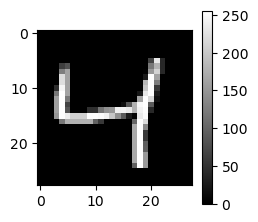

255

In [5]:
print(train_images.shape)
print(test_images.shape)

fig, axs = plt.subplots(figsize=(2.5, 2.5))
img = axs.imshow(train_images[2,:,:], cmap="gray")
plt.colorbar(img, ax=axs)
plt.show()

np.max(train_images[0,:,:])

In [ ]:
# Create a simple MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])



# Create the optimizer with a custom learning rate
# optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for integer labels
              # loss='binary_crossentropy',  # Binary cross-entropy for binary classification (NOT VALID FOR THIS CASE)
              metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()



In [ ]:
# scale the data
train_images, test_images = train_images / 255.0, test_images / 255.0


# # Train the model
# model.fit(train_images, train_labels, epochs=50, batch_size=64)


epochs = 20
pbar = tqdm(total=epochs, desc='Training Progress')

# Train the model
for epoch in range(epochs):

    history = model.fit(train_images, train_labels, epochs=1, batch_size=64, verbose=0)
    
    # Get the loss and accuracy from the training history
    loss = history.history['loss'][0]
    accuracy = history.history['accuracy'][0]
    
    # Update the tqdm progress bar
    pbar.update(1)
    pbar.set_postfix({'Loss': loss, 'Accuracy': accuracy})


# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test accuracy: {test_acc}")
